In [1]:
# Importing libraries

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
# Creating Path

path = r"C:\Users\caden\OneDrive\Desktop\Instacart Basket Analysis 06.22.2022"

In [3]:
df = pd.read_pickle(os.path.join(path, '02. Data', 'Prepared Data', 'df_merged_final.pkl'))

# Question 2

### Bar Chart

<AxesSubplot:>

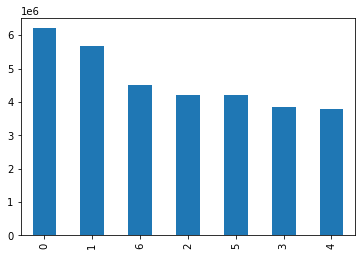

In [4]:
df['order_day_of_week'].value_counts().plot.bar()

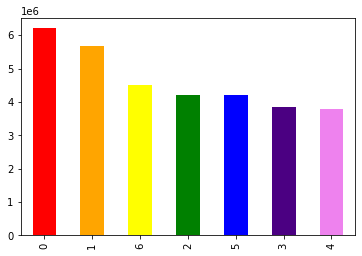

In [5]:
bar = df['order_day_of_week'].value_counts().plot.bar(color =['red', 'orange', 'yellow', 'green', 'blue', 'indigo', 'violet'])

### Scatterplot

In [6]:
df['prices'].max()

99999.0

<AxesSubplot:xlabel='prices', ylabel='prices'>

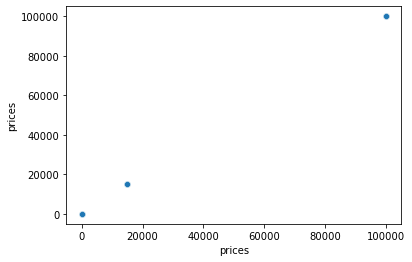

In [7]:
# Using a scatterplot to analize outlier

sns.scatterplot(x = 'prices', y = 'prices',data = df)

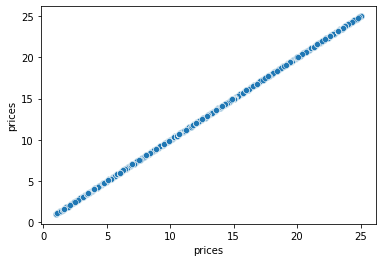

In [34]:
scatterplot = sns.scatterplot(x = 'prices', y = 'prices',data = df)

In [8]:
# Checking for prices with a value higher than $100

df.loc[df['prices'] > 100]

,order_id,user_id,eval_set,order_number,order_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,...,order_frequency_flag,first_name,last_name,gender,state,age,date_joined,number_of_dependants,marital_status,income
7805,1435153,1519,prior,26,2,11,6.0,21553,15,0,...,Non-frequent customer,Craig,Clark,Male,Rhode Island,68,3/4/2020,0,divorced/widowed,177864
7806,1066435,1519,prior,32,3,10,5.0,21553,28,1,...,Non-frequent customer,Craig,Clark,Male,Rhode Island,68,3/4/2020,0,divorced/widowed,177864
15143,1697208,2409,prior,33,1,19,5.0,21553,1,0,...,Non-frequent customer,Nicole,Odonnell,Female,Hawaii,55,11/11/2018,2,married,230074
20264,965345,3531,prior,27,2,19,8.0,33664,2,0,...,Non-frequent customer,Alice,Compton,Female,Hawaii,80,10/6/2019,2,married,233776
20497,2943740,3793,prior,1,2,9,NaN,21553,3,0,...,Non-frequent customer,Jerry,Allen,Male,Louisiana,59,8/23/2019,3,married,182933
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32303799,3265389,51346,prior,4,1,17,13.0,33664,2,1,...,Regular customer,nan,Gould,Male,Rhode Island,58,1/25/2019,1,married,207497
32307882,1179092,131671,prior,12,4,9,15.0,33664,1,0,...,Non-frequent customer,Diana,Hansen,Female,Rhode Island,35,8/4/2018,0,single,86490
32310810,1226705,39667,prior,7,2,15,20.0,33664,14,0,...,Non-frequent customer,Johnny,Colon,Male,Rhode Island,78,5/8/2019,2,married,195077
32330048,3000037,95105,prior,2,4,19,22.0,33664,4,0,...,Non-frequent customer,Catherine,Browning,Female,South Carolina,48,1/18/2017,2,married,398880


In [9]:
# Assigning entries with a value higher than 100 values of nan

df.loc[df['prices'] >100, 'prices'] = np.nan

In [10]:
df['prices'].max()

25.0

### Histogram

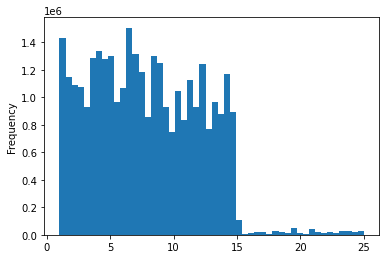

In [11]:
hist = df['prices'].plot.hist(bins = 50)

### Creating sample subset for line chart

In [12]:
np.random.seed(4)

In [13]:
# Create a list holding True/False values to the test

dev = np.random.rand(len(df)) <= 0.7

In [14]:
# Store 70% of the sample in the dataframe big

big = df[dev]

In [15]:
# Store 30% of the sample in the dataframe small

small = df[~dev]

In [16]:
len(df)

32404859

In [17]:
# Check

len(big) + len(small)

32404859

In [18]:
df_2 = small[['order_day_of_week','prices']]

### Line Chart

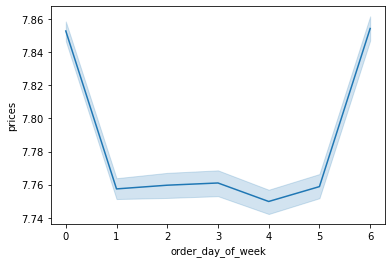

In [19]:
line = sns.lineplot(data = df_2, x = 'order_day_of_week',y = 'prices')

# Question 3

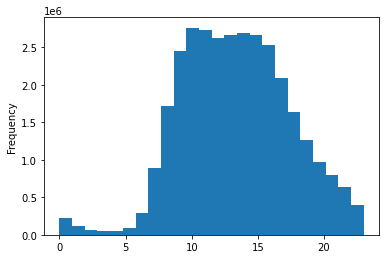

In [20]:
hist_hour = df['order_hour_of_day'].plot.hist(bins = 24)

### The histogram demonstrates when orders are being placed throughout the day and the frequency of orders being placed.

# Question 4

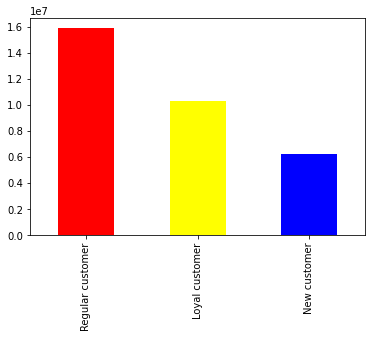

In [21]:
loyalty_bar = df['loyalty_flag'].value_counts().plot.bar(color =['red', 'yellow', 'blue'])

# Question 5

In [23]:
# Using sample data from earlier

df_prices_line = small[['order_hour_of_day', 'prices']]

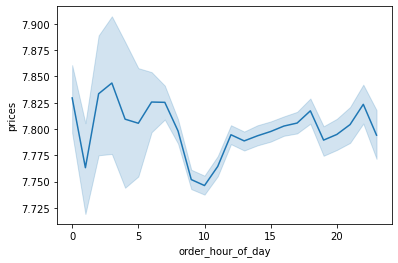

In [24]:
prices_line = sns.lineplot(data = df_prices_line, x = 'order_hour_of_day',y = 'prices')

# Question 6

In [25]:
# Using sample data from earlier

df_cust_demo = small[['age', 'number_of_dependants']]

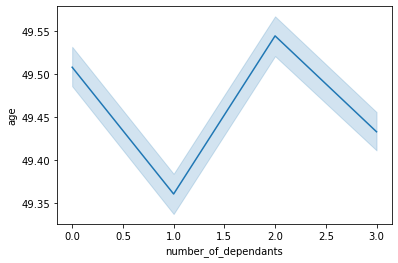

In [27]:
customer_demographics_line = sns.lineplot(data = df_cust_demo, x = 'number_of_dependants',y = 'age')

### The line chart shows the relationship between the number of dependants and the age of instacart users. Younger customers have fewer dependants than older customers.

# Question 7

In [29]:
# Using sample data from before

df_income_age = small [['income', 'age']]

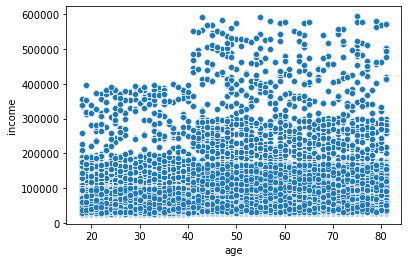

In [30]:
plot_spending = sns.scatterplot(x = 'age', y = 'income', data = df_income_age)

### The plot shows the relationship between age and income and as we can see, individuals who are older have more income.

# Question 8

In [32]:
# Exporting Bar visual

bar.figure.savefig(os.path.join(path, '04. Analysis','Visualizations', 'bar_orders_dow_final.png'))

In [33]:
# Exporting Histogram 

hist.figure.savefig(os.path.join(path, '04. Analysis','Visualizations', 'hist_final.png'))

In [35]:
# Exporting Scatterplot

scatterplot.figure.savefig(os.path.join(path, '04. Analysis','Visualizations', 'scatterplot_final.png'))

In [36]:
# Exporting Line

line.figure.savefig(os.path.join(path, '04. Analysis','Visualizations', 'line_final.png'))

In [37]:
# Exporting hist_hour

hist_hour.figure.savefig(os.path.join(path, '04. Analysis','Visualizations', 'hist_hour_final.png'))

In [38]:
# Exporting loyalty_bar

loyalty_bar.figure.savefig(os.path.join(path, '04. Analysis','Visualizations', 'loyalty_bar_orders_dow_final.png'))

In [39]:
# Exporting prices_line

prices_line.figure.savefig(os.path.join(path, '04. Analysis','Visualizations', 'prices_line_final.png'))

In [40]:
# Exporting customer_demo_line

customer_demographics_line.figure.savefig(os.path.join(path, '04. Analysis','Visualizations', 'line_final.png'))

In [41]:
# Exporting plot_spending

plot_spending.figure.savefig(os.path.join(path, '04. Analysis','Visualizations', 'plot_spending_final.png'))

# End